In [1]:
##Import packages needed (and some not needed....)

import Bio

import openpyxl
from Bio import SeqIO
import os,sys,re

import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__name__, matplotlib.__version__)
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

import scipy.stats as stats
import scipy
print(scipy.__name__, scipy.__version__)

import seaborn as sns
print(sns.__name__, sns.__version__)

from collections import Counter
from functools import reduce

import scipy as sp
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

pandas 1.5.2
numpy 1.23.5
matplotlib 3.4.1
scipy 1.10.0
seaborn 0.12.2


In [2]:
import csv

# Define the input and output file paths
input_file = "CaErg11_GEMME.txt"
output_file = "CaErg11_GEMME.csv"

# Open the input and output files
with open(input_file, "r") as txt_file, open(output_file, "w", newline="") as csv_file:
    # Create a CSV writer
    csv_writer = csv.writer(csv_file)

    # Read the lines from the text file
    lines = txt_file.readlines()

    # Split the first line to get the column headers
    column_headers = [header.strip('"') for header in lines[0].split()]

    # Write the column headers to the CSV file
    csv_writer.writerow(column_headers)

    # Process the data rows
    for line in lines[1:]:
        # Split the data into cells
        data = line.strip().split()

        # Write the data to the CSV file
        csv_writer.writerow(data)

print(f"CSV file '{output_file}' has been created.")

CSV file 'CaErg11_GEMME.csv' has been created.


In [7]:
all_long = pd.read_csv("select_coef_all_conditions_CB_2023-12-07.csv", header=0)

In [8]:
all_long

,Unnamed: 0.1,Unnamed: 0,position,Antifungal,aa,select_coef,p_value,adjusted_p_value,variant,result,aa_WT
0,0,0,55,None,*,-0.528211,8.240903e-210,8.053801e-209,55*,Deleterious,I
1,1,1,55,None,A,-0.004103,7.384538e-01,8.869498e-01,55A,Neutral,I
2,2,2,55,None,C,-0.009924,3.218775e-01,5.661675e-01,55C,Neutral,I
3,3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,Deleterious,I
4,4,4,55,None,E,-0.014590,3.389770e-02,9.943499e-02,55E,Neutral,I
...,...,...,...,...,...,...,...,...,...,...,...
28149,4017,4017,511,Clotri,S,0.075024,1.990360e-04,2.296708e-04,511S,Beneficial,L
28150,4018,4018,511,Clotri,T,-0.135075,1.193329e-12,1.606904e-12,511T,Deleterious,L
28151,4019,4019,511,Clotri,V,0.058365,9.611839e-03,1.057220e-02,511V,Neutral,L
28152,4020,4020,511,Clotri,W,0.093816,1.020725e-03,1.153510e-03,511W,Beneficial,L


In [9]:
# List of dataframes
df_list = [all_long]

# Iterate over each dataframe
for df in df_list:
    # Create a new column 'result' based on conditions
    df['result'] = df.apply(lambda row: 'advantageous' if (row['adjusted_p_value'] < 0.01 and row['select_coef'] > 0)
                       else 'deleterious' if (row['adjusted_p_value'] < 0.01 and row['select_coef'] < 0)
                       else 'wt like', axis=1)

In [10]:
# Read the wide CSV file into a DataFrame
wide_df = pd.read_csv("CaErg11_GEMME.csv")
wide_df = wide_df.reset_index()

# Melt the DataFrame to convert it into the long format
long_df = wide_df.melt(id_vars=['index'], var_name='pos', value_name='Geffect')

# Remove the 'V' prefix from the 'pos' column
long_df['pos'] = long_df['pos'].str.replace('V', '').astype(int)
long_df['index'] = long_df['index'].str.replace('"', '')
long_df['aa'] = long_df['index'].str.upper()

# Sort the DataFrame by 'aa' and 'pos' if needed
df_gemme_ca = long_df.sort_values(by=['aa', 'pos'])

df_gemme_ca

,index,pos,Geffect,aa
0,a,1,-1.286872,A
20,a,2,NaN,A
40,a,3,-0.140241,A
60,a,4,-0.109253,A
80,a,5,-0.063565,A
...,...,...,...,...
10479,y,524,-0.811515,Y
10499,y,525,-1.257976,Y
10519,y,526,-0.553532,Y
10539,y,527,-0.134652,Y


In [14]:
df_dms = all_long[all_long["Antifungal"]=="None"]

In [15]:
df_gemme_ca["Ca_variant"] = df_gemme_ca["pos"].astype(str) + df_gemme_ca["aa"]

In [19]:

df_dms["Ca_variant"] = df_dms["position"].astype(str) + df_dms["aa"]



C:\Users\CABED117\AppData\Local\Temp\ipykernel_22596\1587999309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dms["Ca_variant"] = df_dms["position"].astype(str) + df_dms["aa"]


In [20]:
df_dms

,Unnamed: 0.1,Unnamed: 0,position,Antifungal,aa,select_coef,p_value,adjusted_p_value,variant,result,aa_WT,Ca_variant
0,0,0,55,None,*,-0.528211,8.240903e-210,8.053801e-209,55*,deleterious,I,55*
1,1,1,55,None,A,-0.004103,7.384538e-01,8.869498e-01,55A,wt like,I,55A
2,2,2,55,None,C,-0.009924,3.218775e-01,5.661675e-01,55C,wt like,I,55C
3,3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,deleterious,I,55D
4,4,4,55,None,E,-0.014590,3.389770e-02,9.943499e-02,55E,wt like,I,55E
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,4017,4017,511,None,S,-0.027139,1.626092e-03,6.210924e-03,511S,deleterious,L,511S
4018,4018,4018,511,None,T,-0.021492,4.567569e-03,1.635361e-02,511T,wt like,L,511T
4019,4019,4019,511,None,V,-0.008682,3.179706e-01,5.618751e-01,511V,wt like,L,511V
4020,4020,4020,511,None,W,-0.042223,1.157253e-02,3.861880e-02,511W,wt like,L,511W


In [21]:
df_dms = df_dms[df_dms['aa'] != '*']

df_dms

,Unnamed: 0.1,Unnamed: 0,position,Antifungal,aa,select_coef,p_value,adjusted_p_value,variant,result,aa_WT,Ca_variant
1,1,1,55,None,A,-0.004103,7.384538e-01,8.869498e-01,55A,wt like,I,55A
2,2,2,55,None,C,-0.009924,3.218775e-01,5.661675e-01,55C,wt like,I,55C
3,3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,deleterious,I,55D
4,4,4,55,None,E,-0.014590,3.389770e-02,9.943499e-02,55E,wt like,I,55E
5,5,5,55,None,F,-0.007514,4.279324e-01,6.699669e-01,55F,wt like,I,55F
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,4017,4017,511,None,S,-0.027139,1.626092e-03,6.210924e-03,511S,deleterious,L,511S
4018,4018,4018,511,None,T,-0.021492,4.567569e-03,1.635361e-02,511T,wt like,L,511T
4019,4019,4019,511,None,V,-0.008682,3.179706e-01,5.618751e-01,511V,wt like,L,511V
4020,4020,4020,511,None,W,-0.042223,1.157253e-02,3.861880e-02,511W,wt like,L,511W


In [24]:
merge_df_ca = pd.merge(df_dms, df_gemme_ca, on='Ca_variant', how='left',suffixes=('dms', 'gemme'))


In [25]:
merge_df_ca

,Unnamed: 0.1,Unnamed: 0,position,Antifungal,aadms,select_coef,p_value,adjusted_p_value,variant,result,aa_WT,Ca_variant,index,pos,Geffect,aagemme
0,1,1,55,None,A,-0.004103,7.384538e-01,8.869498e-01,55A,wt like,I,55A,a,55,-2.063172,A
1,2,2,55,None,C,-0.009924,3.218775e-01,5.661675e-01,55C,wt like,I,55C,c,55,-3.022378,C
2,3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,deleterious,I,55D,d,55,-2.493115,D
3,4,4,55,None,E,-0.014590,3.389770e-02,9.943499e-02,55E,wt like,I,55E,e,55,-2.513609,E
4,5,5,55,None,F,-0.007514,4.279324e-01,6.699669e-01,55F,wt like,I,55F,f,55,-0.751252,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,4017,4017,511,None,S,-0.027139,1.626092e-03,6.210924e-03,511S,deleterious,L,511S,s,511,-1.678675,S
4007,4018,4018,511,None,T,-0.021492,4.567569e-03,1.635361e-02,511T,wt like,L,511T,t,511,-1.646645,T
4008,4019,4019,511,None,V,-0.008682,3.179706e-01,5.618751e-01,511V,wt like,L,511V,v,511,-1.561658,V
4009,4020,4020,511,None,W,-0.042223,1.157253e-02,3.861880e-02,511W,wt like,L,511W,w,511,-4.689136,W


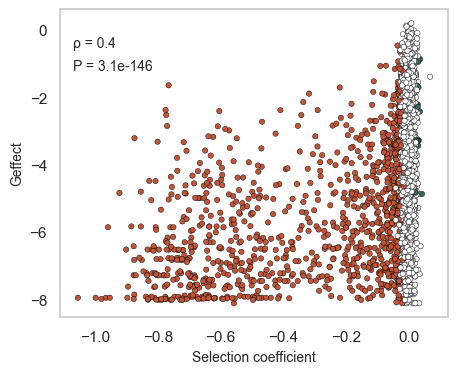

In [26]:

# Remove the grid
sns.set_theme(style="whitegrid")  
fig, axes = plt.subplots(figsize=(5, 4))

custom_palette = sns.blend_palette(["#FFFFFF","#C15539","#386461"], n_colors=3)
sns.scatterplot(y=merge_df_ca["Geffect"],
                        x=merge_df_ca["select_coef"],hue=merge_df_ca["result"],
                        palette=custom_palette,edgecolor="black",s=15,legend=False)

result = sp.stats.spearmanr(merge_df_ca.dropna()["select_coef"], merge_df_ca.dropna()["Geffect"])
coeff = result[0]
p_value = "{:.1e}".format(result[1])
R2 = coeff**2

plt.ylabel("Geffect", fontsize=10)
plt.xlabel("Selection coefficient", fontsize=10)   
# Remove the grid using Matplotlib
plt.grid(False)     
text = "ρ = " + str(round(coeff, 2))
plt.text(-1.07,-0.5, text , fontsize = 10)
plt.text(-1.07,-1.2, "P = "+ str(p_value) , fontsize = 10)


plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('correl_gemme_dms_caerg11.svg', format='svg', dpi=300)
plt.savefig('correl_gemme_dms_caerg11.png', format='png', dpi=300)

In [28]:
p_value

'3.1e-146'

Text(717.25, 0.5, 'Amino acids')

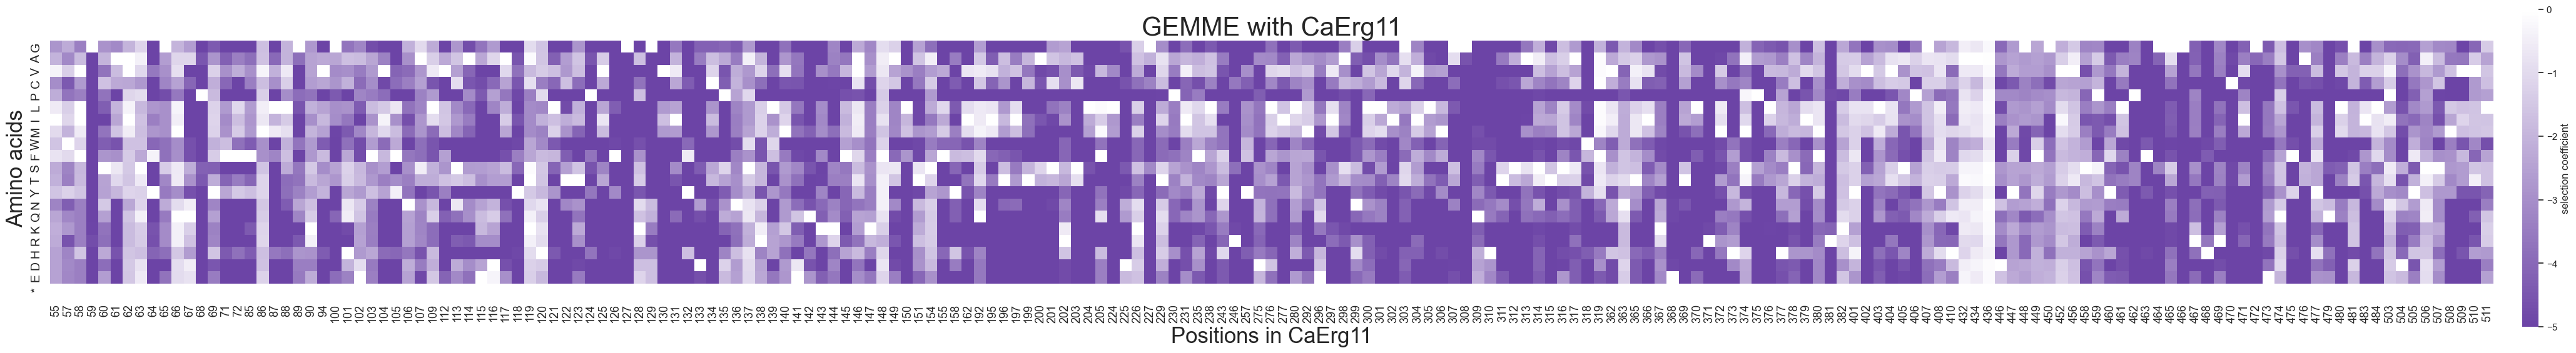

In [28]:
heat = pd.pivot_table(merge_df_ca, index="aadms", columns= "pos", values="Geffect")

heat = heat.reindex(index = ["G","A","V","C","P","L","I","M","W","F","S","T","Y","N","Q","K","R","H","D","E","*"])

custom_palette = sns.blend_palette(["#6C44A6","#FFFFFF"], n_colors=101)

plt.subplots(figsize=(60,60))
sns.set(rc={'figure.facecolor':'white'})
#sns.set(font_scale=1.5)

sns.heatmap(heat, xticklabels="auto", yticklabels=True, annot=False, cmap = custom_palette, 
            robust = True,square=True,  vmin=-5, vmax=0, 
            cbar_kws={"shrink": 0.11,"pad": 0.01,'label': 'selection coefficient'})

plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=13)

        
titre = "GEMME with CaErg11"

plt.title(titre, fontsize =30)

plt.xlabel('Positions in CaErg11', fontsize = 25)
plt.ylabel('Amino acids', fontsize = 25)


In [29]:
df_foldx = pd.read_csv("./foldx_CaERG11.csv", header=0)

df_foldx['Ca_variant'] = df_foldx['position'].astype(str) + df_foldx['aa']
df_foldx['name'] = df_foldx['position'].astype(str) + df_foldx['aa'] + "_"+ df_foldx['Antifungal']


In [30]:
merge_df_ca_foldx = pd.merge(merge_df_ca, df_foldx, on='Ca_variant', how='left',suffixes=('1', '2'))

In [31]:
merge_df_ca

,Unnamed: 0.1,Unnamed: 0,position,Antifungal,aadms,select_coef,p_value,adjusted_p_value,variant,result,aa_WT,Ca_variant,index,pos,Geffect,aagemme
0,1,1,55,None,A,-0.004103,7.384538e-01,8.869498e-01,55A,wt like,I,55A,a,55,-2.063172,A
1,2,2,55,None,C,-0.009924,3.218775e-01,5.661675e-01,55C,wt like,I,55C,c,55,-3.022378,C
2,3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,deleterious,I,55D,d,55,-2.493115,D
3,4,4,55,None,E,-0.014590,3.389770e-02,9.943499e-02,55E,wt like,I,55E,e,55,-2.513609,E
4,5,5,55,None,F,-0.007514,4.279324e-01,6.699669e-01,55F,wt like,I,55F,f,55,-0.751252,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,4017,4017,511,None,S,-0.027139,1.626092e-03,6.210924e-03,511S,deleterious,L,511S,s,511,-1.678675,S
4007,4018,4018,511,None,T,-0.021492,4.567569e-03,1.635361e-02,511T,wt like,L,511T,t,511,-1.646645,T
4008,4019,4019,511,None,V,-0.008682,3.179706e-01,5.618751e-01,511V,wt like,L,511V,v,511,-1.561658,V
4009,4020,4020,511,None,W,-0.042223,1.157253e-02,3.861880e-02,511W,wt like,L,511W,w,511,-4.689136,W


In [32]:
df_foldx_g = df_foldx.dropna().groupby("Antifungal")
df_itra_foldx = df_foldx_g.get_group("Itra").reset_index()

In [33]:
import numpy as np
df_itra_foldx['ddG'] = np.where(df_itra_foldx['ddG'] > 5, 5, df_itra_foldx['ddG'])
df_itra_foldx['ddG'] = np.where(df_itra_foldx['ddG'] < -5, -5, df_itra_foldx['ddG'])
df_itra_foldx

,index,position,wt,aa,ddGbind_lig,Antifungal,ddG,ddGbind_hem,Ca_variant,name
0,2,25,I,G,0.0,Itra,-0.37530,0.0,25G,25G_Itra
1,6,26,L,G,0.0,Itra,-0.63901,0.0,26G,26G_Itra
2,10,27,L,G,0.0,Itra,0.33595,0.0,27G,27G_Itra
3,14,28,G,G,0.0,Itra,0.00000,0.0,28G,28G_Itra
4,18,29,V,G,0.0,Itra,1.54364,0.0,29G,29G_Itra
...,...,...,...,...,...,...,...,...,...,...
9755,48237,520,W,H,0.0,Itra,3.37022,0.0,520H,520H_Itra
9756,48242,521,E,H,0.0,Itra,0.24913,0.0,521H,521H_Itra
9757,48247,522,K,H,0.0,Itra,5.00000,0.0,522H,522H_Itra
9758,48252,523,R,H,0.0,Itra,1.59404,0.0,523H,523H_Itra


In [34]:
merge_df_ca_foldx = pd.merge(merge_df_ca, df_itra_foldx, on='Ca_variant', how='left',suffixes=('1', '2'))

In [35]:
merge_df_ca_foldx

,Unnamed: 0.1,Unnamed: 0,position1,Antifungal1,aadms,select_coef,p_value,adjusted_p_value,variant,result,...,aagemme,index2,position2,wt,aa,ddGbind_lig,Antifungal2,ddG,ddGbind_hem,name
0,1,1,55,None,A,-0.004103,7.384538e-01,8.869498e-01,55A,wt like,...,A,2541.0,55.0,I,A,-0.00342,Itra,1.50573,0.00000,55A_Itra
1,2,2,55,None,C,-0.009924,3.218775e-01,5.661675e-01,55C,wt like,...,C,26671.0,55.0,I,C,0.00174,Itra,1.14759,0.00000,55C_Itra
2,3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,deleterious,...,D,36323.0,55.0,I,D,-0.07693,Itra,1.38678,0.00000,55D_Itra
3,4,4,55,None,E,-0.014590,3.389770e-02,9.943499e-02,55E,wt like,...,E,38736.0,55.0,I,E,-0.10883,Itra,0.57731,0.00000,55E_Itra
4,5,5,55,None,F,-0.007514,4.279324e-01,6.699669e-01,55F,wt like,...,F,14606.0,55.0,I,F,0.00800,Itra,0.03680,0.00000,55F_Itra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,4017,4017,511,None,S,-0.027139,1.626092e-03,6.210924e-03,511S,deleterious,...,S,24062.0,511.0,L,S,0.00000,Itra,1.52008,0.00000,511S_Itra
4007,4018,4018,511,None,T,-0.021492,4.567569e-03,1.635361e-02,511T,wt like,...,T,26475.0,511.0,L,T,-0.00586,Itra,1.40101,0.00000,511T_Itra
4008,4019,4019,511,None,V,-0.008682,3.179706e-01,5.618751e-01,511V,wt like,...,V,7171.0,511.0,L,V,-0.00659,Itra,0.61566,0.00000,511V_Itra
4009,4020,4020,511,None,W,-0.042223,1.157253e-02,3.861880e-02,511W,wt like,...,W,19236.0,511.0,L,W,-0.01352,Itra,0.90924,0.00252,511W_Itra


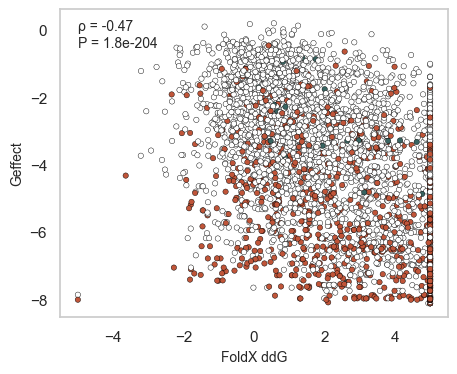

In [36]:
# Remove the grid
sns.set_theme(style="whitegrid")  
fig, axes = plt.subplots(figsize=(5, 4))

custom_palette = sns.blend_palette(["#FFFFFF","#C15539","#386461"], n_colors=3)
sns.scatterplot(y=merge_df_ca_foldx["Geffect"],
                        x=merge_df_ca_foldx["ddG"],hue=merge_df_ca_foldx["result"],
                        palette=custom_palette,edgecolor="black",s=15,legend=False)

result = sp.stats.spearmanr(merge_df_ca_foldx.dropna()["ddG"], merge_df_ca_foldx.dropna()["Geffect"])
coeff = result[0]
p_value = "{:.1e}".format(result[1])
R2 = coeff**2

plt.ylabel("Geffect", fontsize=10)
plt.xlabel("FoldX ddG", fontsize=10)   
# Remove the grid using Matplotlib
plt.grid(False)     
text = "ρ = " + str(round(coeff, 2))
plt.text(-5,0, text , fontsize = 10)
plt.text(-5,-0.5, "P = "+ str(p_value) , fontsize = 10)


plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('correl_gemme_foldx_dms_caerg11.svg', format='svg', dpi=300)
plt.savefig('correl_gemme_foldx_dms_caerg11.png', format='png', dpi=300)